# RDF-   NLS -  Encyclopaedia Britannica

This notebook is going to create the RDF triples to generate our RDLIB GRAPH

For each postprocess edition dataframe that we got from **Merging_EB_Terms.ipynb** (e.g. results_eb_1_edition_dataframe, results_eb_2_edition_dataframe, etc) we are going to add the information from the dataframe that we got from **Metadata_EB.ipynb** (metadata_eb_dataframe). 

The idea is to have per edition dataframe (and also supplement dataframe), all the information (which currently is splitted across several dataframes) in one. 


This notebook will store the final dataframes in results_NLS directory, and their name schema will be **final_eb_< NUM_EDITION >_dataframe**.

Per entry in these new dataframes we will have the following columns (see an example of one entry of the first edition):

- MMSID:                                              
- editionTitle:                          First edition, 1771, Volume 1, A-B
- editor:                                                  Smellie, William
- editor_date:                                                   1740-1795
- genre:                                                       encyclopedia
- language:                                                             eng
- termsOfAddress:                                                       NaN
- numberOfPages:                                                        832
- physicalDescription:               3 v., 160 plates : ill. ; 26 cm. (4to)
- place:                                                         Edinburgh
- publisher:              Printed for A. Bell and C. Macfarquhar; and so...
- referencedBy:           [Alston, R.C.  Engl. language III, 560, ESTC T...
- shelfLocator:                                                        EB.1
- editionSubTitle:        Illustrated with one hundred and sixty copperp...
- volumeTitle:            Encyclopaedia Britannica; or, A dictionary of ...
- year:                                                                1771
- volumeId:                                                       144133901
- metsXML:                                               144133901-mets.xml
- permanentURL:                            https://digital.nls.uk/144133901
- publisherPersons:                     [C. Macfarquhar, Colin Macfarquhar]
- volumeNum:                                                              1
- letters:                                                              A-B
- part:                                                                   0
- editionNum:                                                             1
- supplementTitle:                                                         
- supplementSubTitle:                                                      
- supplementsTo:                                                         []
- numberOfVolumes:                                                        6
- term:                                                                  OR
- definition:             A NEW A D I C T I A A, the name of several riv...
- relatedTerms:                                                          []
- header:                                           EncyclopaediaBritannica
- startsAt:                                                              15
- endsAt:                                                                15
- numberOfTerms:                                                         22
- numberOfWords:                                                         54
- positionPage:                                                           0
- typeTerm:                                                         Article
- altoXML:                                  144133901/alto/188082904.34.xml

### Loading the necessary libraries

In [1]:
import rdflib
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
import networkx as nx
import matplotlib.pyplot as pl
from rdflib import Graph, ConjunctiveGraph, Namespace, Literal
from rdflib.plugins.sparql import prepareQuery

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from SPARQLWrapper import SPARQLWrapper, JSON

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Functions

In [147]:
def plot_resource(results):

    G = rdflib_to_networkx_multidigraph(results)
    pos = nx.spring_layout(G, scale=3)
    edge_labels = nx.get_edge_attributes(G, 'r')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    nx.draw(G, with_labels=True)
    plt.show()

### 1. Loading the graph

In [108]:
g = Graph()
g.parse("../../results_NLS/edition1st.ttl", format="ttl") 

<Graph identifier=N5bbf3276125d4f6f84996699f7cab846 (<class 'rdflib.graph.Graph'>)>

List all the resources with the property eb:editor

In [109]:
eb = Namespace("https://w3id.org/eb#")

q1 = prepareQuery('''
  SELECT ?Edition WHERE { 
    ?Edition eb:editor ?FullName. 
  }
  ''',
  initNs = { "eb": eb}
)


for r in g.query(q1):
      print(r.Edition)

https://w3id.org/eb/i/Edition/9929192893804340
https://w3id.org/eb/i/Edition/992277653804341


Same query but asking more information about the resources obtained. 

In [110]:
q2 = prepareQuery('''
  SELECT ?Subject ?Editor WHERE { 
    ?Subject eb:editor ?Editor.
  } 
  ''',
  initNs = { "eb": eb}
)

for r in g.query(q2):
  print(r.Subject, r.Editor)

https://w3id.org/eb/i/Edition/9929192893804340 https://w3id.org/eb/i/Person/Smellie,William
https://w3id.org/eb/i/Edition/992277653804341 https://w3id.org/eb/i/Person/Smellie,William


In [163]:
q2a = prepareQuery('''
SELECT DISTINCT ?name
    WHERE {
     ?instance eb:editor ?Editor.
     ?Editor eb:name ?name .
    }
    ''',
  initNs = { "eb": eb}
)

for r in g.query(q2a):
      print(r.name)

Smellie, William


In [169]:
res=g.query(q2a)
a=list(res)[0]
a.name

rdflib.term.Literal('Smellie, William', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string'))

Same query asking for the first 10 resources with the properity eb.name

In [112]:
q2 = prepareQuery('''
  SELECT ?Subject ?Name WHERE { 
    ?Subject eb:name ?Name.
  } 
  LIMIT 10
  ''',
  initNs = { "eb": eb}
)

for r in g.query(q2):
    print(r.Subject, r.Name)

https://w3id.org/eb/i/Article/992277653804341_144133903_STELLIONATE_0 STELLIONATE
https://w3id.org/eb/i/Article/9929192893804340_144850367_GYSHORN_0 GYSHORN
https://w3id.org/eb/i/Article/9929192893804340_144850367_LABOUR_0 LABOUR
https://w3id.org/eb/i/Article/992277653804341_144133902_LUNENBURG_0 LUNENBURG
https://w3id.org/eb/i/Article/9929192893804340_144850368_MULE_0 MULE
https://w3id.org/eb/i/Article/992277653804341_144133901_AMMA_0 AMMA
https://w3id.org/eb/i/Article/9929192893804340_144850366_BILLETING_0 BILLETING
https://w3id.org/eb/i/Article/992277653804341_144133901_BERLIN_0 BERLIN
https://w3id.org/eb/i/Article/992277653804341_144133903_TRIPARTITE_0 TRIPARTITE
https://w3id.org/eb/i/Article/9929192893804340_144850368_OBLIQUITY_0 OBLIQUITY


In [156]:
from rdflib import XSD
q2 = prepareQuery('''
SELECT DISTINCT ?name
WHERE {
 ?instance eb:editor ?editor;
           eb:place ?place;
           eb:title ?name.
  
}
LIMIT 10
  ''',
  initNs = { "eb": eb}
)

for r in g.query(q2, initBindings = {'?place' : Literal('London', datatype=XSD.string)}):
    print(r.name)

Asking for resources which name is "Smellie, Willian"

In [114]:
from rdflib import XSD
q3 = prepareQuery('''
  SELECT ?Subject WHERE { 
    ?Subject eb:name ?Family.
  } 
  ''',
    initNs = { "eb": eb}
)

for r in g.query(q3, initBindings = {'?Family' : Literal('Smellie, William', datatype=XSD.string)}):
  print(r.Subject)

https://w3id.org/eb/i/Person/Smellie,William


Asking for resources with name is ABACUS

In [115]:
from rdflib import XSD
q3 = prepareQuery('''
  SELECT ?Subject WHERE { 
    ?Subject eb:name ?Term.
  } 
  ''',
    initNs = { "eb": eb}
)

for r in g.query(q3, initBindings = {'?Term' : Literal('ABACUS', datatype=XSD.string)}):
  print(r.Subject)

https://w3id.org/eb/i/Article/9929192893804340_144850366_ABACUS_3
https://w3id.org/eb/i/Article/9929192893804340_144850366_ABACUS_1
https://w3id.org/eb/i/Article/992277653804341_144133901_ABACUS_3
https://w3id.org/eb/i/Article/9929192893804340_144850366_ABACUS_0
https://w3id.org/eb/i/Article/992277653804341_144133901_ABACUS_1
https://w3id.org/eb/i/Article/992277653804341_144133901_ABACUS_2
https://w3id.org/eb/i/Article/9929192893804340_144850366_ABACUS_2
https://w3id.org/eb/i/Article/992277653804341_144133901_ABACUS_0


In [116]:
from rdflib import XSD
q4 = prepareQuery('''
  SELECT ?Subject ?Term WHERE { 
    ?Subject eb:name ?Term.
  } 
  ''',
    initNs = { "eb": eb}
)

for r in g.query(q4, initBindings = {'?Term' : Literal('ABACUS', datatype=XSD.string)}):
  print(r.Subject, r.Term)

https://w3id.org/eb/i/Article/9929192893804340_144850366_ABACUS_3 ABACUS
https://w3id.org/eb/i/Article/9929192893804340_144850366_ABACUS_1 ABACUS
https://w3id.org/eb/i/Article/992277653804341_144133901_ABACUS_3 ABACUS
https://w3id.org/eb/i/Article/9929192893804340_144850366_ABACUS_0 ABACUS
https://w3id.org/eb/i/Article/992277653804341_144133901_ABACUS_1 ABACUS
https://w3id.org/eb/i/Article/992277653804341_144133901_ABACUS_2 ABACUS
https://w3id.org/eb/i/Article/9929192893804340_144850366_ABACUS_2 ABACUS
https://w3id.org/eb/i/Article/992277653804341_144133901_ABACUS_0 ABACUS


In [117]:
q5 = prepareQuery('''
    SELECT ?edition
    WHERE {
       ?edition rdf:type eb:Edition .
    }
    ''',
  initNs = { "eb": eb}
)

for r in g.query(q5):
  print(r.edition)

https://w3id.org/eb/i/Edition/992277653804341
https://w3id.org/eb/i/Edition/9929192893804340


In [118]:
q5 = prepareQuery('''
    SELECT ?topic
    WHERE {
       ?topic rdf:type eb:Topic .
    }
    LIMIT 10
    ''',
  initNs = { "eb": eb}
)

for r in g.query(q5):
  print(r.topic)

https://w3id.org/eb/i/Topic/992277653804341_144133903_METAPHYSICS_0
https://w3id.org/eb/i/Topic/9929192893804340_144850368_PP_0
https://w3id.org/eb/i/Topic/992277653804341_144133902_EXCS_0
https://w3id.org/eb/i/Topic/9929192893804340_144850368_IK_0
https://w3id.org/eb/i/Topic/992277653804341_144133902_GEOMETRY_0
https://w3id.org/eb/i/Topic/992277653804341_144133903_TRIGONOMETRY_0
https://w3id.org/eb/i/Topic/9929192893804340_144850367_ELECTELECT_0
https://w3id.org/eb/i/Topic/992277653804341_144133903_TRICON_0
https://w3id.org/eb/i/Topic/9929192893804340_144850366_ASTRONOMY_2
https://w3id.org/eb/i/Topic/9929192893804340_144850366_BLEACKING_0


In [119]:
q6 = prepareQuery('''
    SELECT *
    WHERE {
       ?topic a eb:Topic .
       ?topic eb:relatedTerms ?relatedTerms . 
       ?topic eb:name ?name .
       ?topic eb:startsAt ?startsAt.
       ?topic eb:endsAt ?endsAt.
    }
    LIMIT 10
    ''',
  initNs = { "eb": eb}
)

for r in g.query(q6):
  print(r.topic, r.relatedTerms, r.name, r.startsAt, r.endsAt)

In [120]:
q6 = prepareQuery('''
    SELECT *
    WHERE {
       ?article a eb:Article .
       ?article eb:relatedTerms ?relatedTerms . 
       ?article eb:name ?name .
       ?article eb:definition ?definition.
    }
    LIMIT 5
    ''',
  initNs = { "eb": eb}
)

for r in g.query(q6):
  print(r.article, r.relatedTerms, r.name, r.definition)

https://w3id.org/eb/i/Article/992277653804341_144133901_BENCH_0 https://w3id.org/eb/i/Article/992277653804341_144133902_ENGLAND_0 BENCH or Banc, in law. See Banc. Free Bench signifies that estate in copyhold-lands, whichthe wife, being espoused a virgin, has, after the decease of her husband, for her dower, according to the custom of the manor. As to this free-bench, several manors have several customs; and in the manors of East and West Enbourne, in the county of Berks, and other parts of England, there is a custom, that when a copyhold tenant dies, the widow (hall have her freebench in all the deceased husband’s lands, whilst (he lives Angle and ehafte ; but if she commits incontinency, she (hall forfeit her estate : Nevertheless, upon her coming into the court of the manor, riding on x black ram, and having his tail in her hand, and at the same time repeating a form of words preferibed, the steward is obliged, by the custom of the manor, to readmit her to her free-bench. Widow' s Be

In [121]:
q6 = prepareQuery('''
    SELECT *
    WHERE {
       ?article a eb:Article . 
       ?article eb:name ?name .
       ?article eb:definition ?definition.
    }
    LIMIT 5
    ''',
  initNs = { "eb": eb}
)

for r in g.query(q6):
  print(r.article, r.name, r.definition)

https://w3id.org/eb/i/Article/992277653804341_144133901_AMAPALLA_0 AMAPALLA a. sea-port town of Mexico, in the pro, vince of Guatimala, situated on the Pacific ocean, in 93 0 W. long, and
https://w3id.org/eb/i/Article/992277653804341_144133902_EBDOMARIUS_0 EBDOMARIUS in ecelefiartical writers, an officer formeily appointed weekly to fuperintend the performance of divine fcrvice in cathedrals, and preferibe the duties ofeach person attending i. n the choir, as to reading, -singing, praying, be.
https://w3id.org/eb/i/Article/9929192893804340_144850368_REPTILES_0 REPTILES in natural history, a kind of animals denominated from their creeping or advancing on the belly. Or reptiles are a genus of animals and infe&s, which, instead of feet, rest on one part of the body, while they advance forward with the rest. Such are earthworms, snakes, caterpillars, 6<r.
https://w3id.org/eb/i/Article/9929192893804340_144850367_CLACK_0 CLACK among country-men. To clack wool, is to cut off the. ftieep’s mar

In [122]:
q7 = prepareQuery('''
  SELECT  ?Subject ?Definition ?HasPart ?Title WHERE {
    ?Subject eb:name ?Term.
    ?Subject eb:definition ?Definition.
    ?HasPart eb:hasPart ?Subject.
    ?HasPart eb:title ?Title
  }  
  ''',
  initNs = { "eb": eb}
)

for r in g.query(q7, initBindings = {'?Term' : Literal('ABACUS', datatype=XSD.string)}):
  print(r.Subject, r.Definition, r.HasPart, r.Title)
  print("----")



https://w3id.org/eb/i/Article/9929192893804340_144850366_ABACUS_3 Pythagoricus, the multiplication-table, or any table of numbers that facilitates operations in arith- https://w3id.org/eb/i/Volume/9929192893804340_144850366 Encyclopaedia Britannica: or, A dictionary of arts and sciences
----
https://w3id.org/eb/i/Article/9929192893804340_144850366_ABACUS_1 in architedture, signifies the superior part or member of the capital of a column, and serves as a kind of crowning to both. It was originally intended to represent a square tile covering a basket. The form of the abacus is not the same in all orders: in the Tuscan, Doric, and Ionic, it is generally square; biit in the Corinthian and Compofite, its four sides are arched inwards, and embellilhed in the middle withornament, as a rose or other flower. Scammozzi uses abacus for a concave moulding on the capital of the Tuscan pedestal; and Palladio calls the plinth above the echinus, or boultin, in the Tuscan and Doric orders, by the same

In [123]:
q7 = prepareQuery('''
  SELECT  ?Subject ?RelatedTerms WHERE {
    ?Subject eb:name ?Term.
    ?RelatedTerms eb:relatedTerms ?Subject.

    
  }  
  ''',
  initNs = { "eb": eb}
)

for r in g.query(q7, initBindings = {'?Term' : Literal('ABACUS', datatype=XSD.string)}):
  print(r.Subject, r.RelatedTerms)
  print("----")


https://w3id.org/eb/i/Article/9929192893804340_144850366_ABACUS_3 https://w3id.org/eb/i/Article/9929192893804340_144850366_ABACISCUS_0
----
https://w3id.org/eb/i/Article/9929192893804340_144850366_ABACUS_1 https://w3id.org/eb/i/Article/9929192893804340_144850366_ABACISCUS_0
----
https://w3id.org/eb/i/Article/992277653804341_144133901_ABACUS_3 https://w3id.org/eb/i/Article/992277653804341_144133901_ABACISCUS_0
----
https://w3id.org/eb/i/Article/9929192893804340_144850366_ABACUS_0 https://w3id.org/eb/i/Article/9929192893804340_144850366_ABACISCUS_0
----
https://w3id.org/eb/i/Article/992277653804341_144133901_ABACUS_1 https://w3id.org/eb/i/Article/992277653804341_144133901_ABACISCUS_0
----
https://w3id.org/eb/i/Article/992277653804341_144133901_ABACUS_2 https://w3id.org/eb/i/Article/992277653804341_144133901_ABACISCUS_0
----
https://w3id.org/eb/i/Article/9929192893804340_144850366_ABACUS_2 https://w3id.org/eb/i/Article/9929192893804340_144850366_ABACISCUS_0
----
https://w3id.org/eb/i/Arti

In [124]:
#G = rdflib_to_networkx_multidigraph(result)

# Plot Networkx instance of RDF Graph
#pos = nx.spring_layout(G, scale=2)
#edge_labels = nx.get_edge_attributes(G, 'r')
#nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
#nx.draw(G, with_labels=True)

#if not in interactive mode for 
#plt.show()


### 3. Connecting with FUSEKI and using SPARQLWrapper

#### 3.1 Basic query

In [125]:
sparql = SPARQLWrapper("http://localhost:3030/edition1st/sparql")
sparql.setQuery("""
    SELECT ?subject ?predicate ?object WHERE {   ?subject ?predicate ?object } LIMIT 5 
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

results

for result in results["results"]["bindings"]:
    print(result["subject"]["value"], result["predicate"]["value"], result["object"]["value"] )


https://w3id.org/eb/i/Article/9929192893804340_144850368_PAISLEY_0 https://w3id.org/eb#position 4
https://w3id.org/eb/i/Article/9929192893804340_144850368_PAISLEY_0 https://w3id.org/eb#numberOfWords 14
https://w3id.org/eb/i/Article/9929192893804340_144850368_PAISLEY_0 https://w3id.org/eb#name PAISLEY
https://w3id.org/eb/i/Article/9929192893804340_144850368_PAISLEY_0 http://www.w3.org/1999/02/22-rdf-syntax-ns#type https://w3id.org/eb#Article
https://w3id.org/eb/i/Article/9929192893804340_144850368_PAISLEY_0 https://w3id.org/eb#definition a town of Scotland, in the county of Renfrew, six miles west of Glasgow.


#### 3.2 Describe query

In [148]:
sparql = SPARQLWrapper("http://localhost:3030/edition1st/sparql")
sparql.setQuery("""
    DESCRIBE <https://w3id.org/eb/i/Article/9929192893804340_144850368_PAISLEY_0>
""")

sparql.setReturnFormat(JSON)
results = sparql.query().convert()


##### 3.2.1 Plot Describe Result Graph 

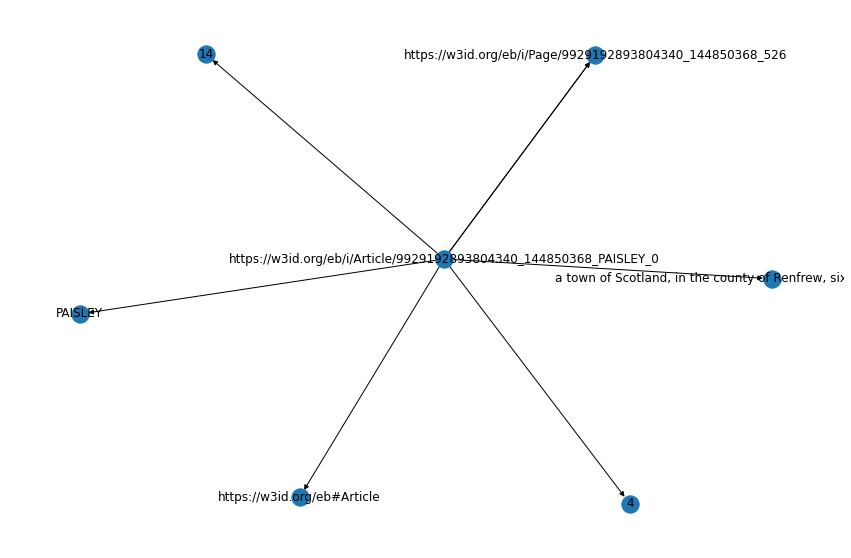

In [150]:

plot_resource(results)

##### 3.2.1 Print Describe Result Graph 

In [128]:
for s,p,o in results:
      print(s,p,o)

https://w3id.org/eb/i/Article/9929192893804340_144850368_PAISLEY_0 https://w3id.org/eb#endsAtPage https://w3id.org/eb/i/Page/9929192893804340_144850368_526
https://w3id.org/eb/i/Article/9929192893804340_144850368_PAISLEY_0 https://w3id.org/eb#name PAISLEY
https://w3id.org/eb/i/Article/9929192893804340_144850368_PAISLEY_0 https://w3id.org/eb#position 4
https://w3id.org/eb/i/Article/9929192893804340_144850368_PAISLEY_0 https://w3id.org/eb#startsAtPage https://w3id.org/eb/i/Page/9929192893804340_144850368_526
https://w3id.org/eb/i/Article/9929192893804340_144850368_PAISLEY_0 https://w3id.org/eb#definition a town of Scotland, in the county of Renfrew, six miles west of Glasgow.
https://w3id.org/eb/i/Article/9929192893804340_144850368_PAISLEY_0 https://w3id.org/eb#numberOfWords 14
https://w3id.org/eb/i/Article/9929192893804340_144850368_PAISLEY_0 http://www.w3.org/1999/02/22-rdf-syntax-ns#type https://w3id.org/eb#Article


In [129]:
sparql = SPARQLWrapper("http://localhost:3030/edition1st/sparql")
sparql.setQuery("""
    PREFIX eb: <https://w3id.org/eb#>
    SELECT * WHERE {
       ?article a eb:Article .
       ?article eb:relatedTerms ?relatedTerms . 
       ?article eb:name ?name .
       ?article eb:definition ?definition.
    }
  LIMIT 5 
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()


In [130]:
for result in results["results"]["bindings"]:
    print("URI: %s -- Name %s -- Related Term: %s -- Definition %s " %(result["article"]["value"], result["name"]["value"], result["relatedTerms"]["value"], result["definition"]["value"] ))
    print("----")

URI: https://w3id.org/eb/i/Article/9929192893804340_144850368_PRIOR_0 -- Name PRIOR -- Related Term: https://w3id.org/eb/i/Article/9929192893804340_144850366_AVILA_0 -- Definition the superior of a convent of monks,.or the next under the abbot. See Abbot. PRISCILLIANISTS, in church-history, Christian heretics, so called from their leader Prifcillian, a Spaniard by birth, and bilhop of Avila. He is said to have praftifed magic, and to have maintained the principal errors of the Manichees ; but his peculiar tenet was, that it is lawful to make false oaths, in order to support one’s cause and 
----
URI: https://w3id.org/eb/i/Article/992277653804341_144133902_CONSUMPTION_0 -- Name CONSUMPTION -- Related Term: https://w3id.org/eb/i/Article/992277653804341_144133903_MEDICINE_0 -- Definition in medicine, a word of very extensive fignification, implies all disorders that bring any decay or waste upon the conf Htution; but is molt used for the phthifis pulmonalis. See Medicine. 
----
URI: https

In [4]:
sparql = SPARQLWrapper("http://localhost:3030/edition1st/sparql")
sparql.setQuery("""
    PREFIX eb: <https://w3id.org/eb#>
       SELECT * WHERE {
       ?article a eb:Article .
       ?article eb:relatedTerms ?relatedTerms . 
       ?article eb:name ?name .
       ?article eb:definition ?definition.
  	   FILTER regex(?name, "^ABACISCUS") 
    }
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
for result in results["results"]["bindings"]:
    print("URI: %s -- Name %s -- Related Term: %s -- Definition %s " %(result["article"]["value"], result["name"]["value"], result["relatedTerms"]["value"], result["definition"]["value"] ))
    print("----")

URI: https://w3id.org/eb/i/Article/992277653804341_144133901_ABACISCUS_0 -- Name ABACISCUS -- Related Term: https://w3id.org/eb/i/Article/992277653804341_144133901_ABACUS_1 -- Definition See ABACUS. 
----
URI: https://w3id.org/eb/i/Article/992277653804341_144133901_ABACISCUS_0 -- Name ABACISCUS -- Related Term: https://w3id.org/eb/i/Article/992277653804341_144133901_ABACUS_0 -- Definition See ABACUS. 
----
URI: https://w3id.org/eb/i/Article/992277653804341_144133901_ABACISCUS_0 -- Name ABACISCUS -- Related Term: https://w3id.org/eb/i/Article/992277653804341_144133901_ABACUS_2 -- Definition See ABACUS. 
----
URI: https://w3id.org/eb/i/Article/992277653804341_144133901_ABACISCUS_0 -- Name ABACISCUS -- Related Term: https://w3id.org/eb/i/Article/992277653804341_144133901_ABACUS_3 -- Definition See ABACUS. 
----
URI: https://w3id.org/eb/i/Article/9929192893804340_144850366_ABACISCUS_0 -- Name ABACISCUS -- Related Term: https://w3id.org/eb/i/Article/9929192893804340_144850366_ABACUS_1 -- De

In [146]:
sparql = SPARQLWrapper("http://localhost:3030/edition1st/sparql")
sparql.setQuery("""
PREFIX eb: <https://w3id.org/eb#>
SELECT * WHERE {
       ?article a eb:Article .
       ?article eb:name ?name .
       FILTER regex(?name, "^ABACUS")
    }
    ORDER BY ?name
    LIMIT 10
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
for result in results["results"]["bindings"]:
    print("URI: %s -- Name %s " %(result["article"]["value"], result["name"]["value"]))
    print("----")

URI: https://w3id.org/eb/i/Article/992277653804341_144133901_ABACUS_0 -- Name ABACUS 
----
URI: https://w3id.org/eb/i/Article/992277653804341_144133901_ABACUS_1 -- Name ABACUS 
----
URI: https://w3id.org/eb/i/Article/992277653804341_144133901_ABACUS_2 -- Name ABACUS 
----
URI: https://w3id.org/eb/i/Article/992277653804341_144133901_ABACUS_3 -- Name ABACUS 
----
URI: https://w3id.org/eb/i/Article/9929192893804340_144850366_ABACUS_0 -- Name ABACUS 
----
URI: https://w3id.org/eb/i/Article/9929192893804340_144850366_ABACUS_1 -- Name ABACUS 
----
URI: https://w3id.org/eb/i/Article/9929192893804340_144850366_ABACUS_2 -- Name ABACUS 
----
URI: https://w3id.org/eb/i/Article/9929192893804340_144850366_ABACUS_3 -- Name ABACUS 
----


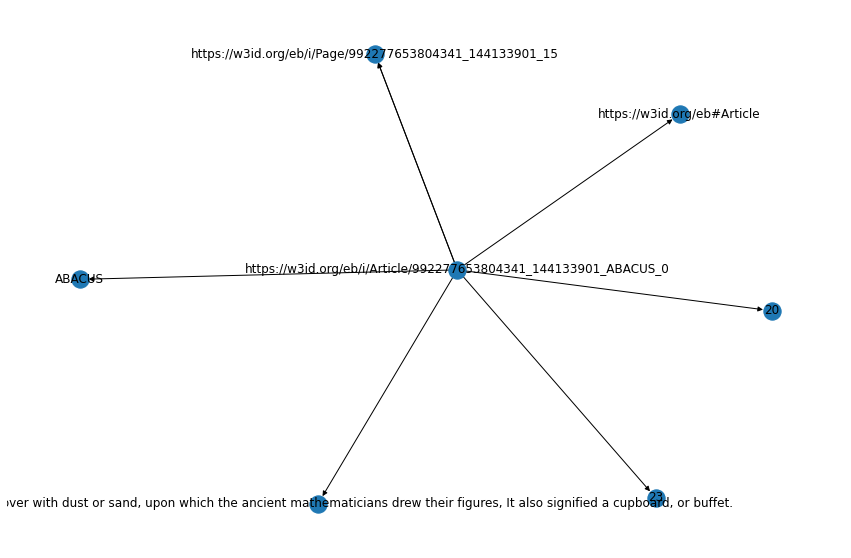

In [155]:
sparql = SPARQLWrapper("http://localhost:3030/edition1st/sparql")
sparql.setQuery("""
    DESCRIBE <https://w3id.org/eb/i/Article/992277653804341_144133901_ABACUS_0>
""")

sparql.setReturnFormat(JSON)
results = sparql.query().convert()
plot_resource(results)

In [172]:
sparql = SPARQLWrapper("http://localhost:3030/edition1st/sparql")
sparql.setQuery("""
    PREFIX eb: <https://w3id.org/eb#>
    SELECT ?year WHERE {
       ?edition a eb:Edition .
       ?edition eb:publicationYear ?year 
    }

""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

In [177]:
results["results"]["bindings"][0]["year"]["value"]


'1771'

In [180]:
sparql = SPARQLWrapper("http://localhost:3030/edition1st/sparql")
sparql.setQuery("""
         PREFIX eb: <https://w3id.org/eb#>
         SELECT DISTINCT ?name
         WHERE {
         ?instance eb:editor ?Editor.
          ?Editor eb:name ?name .
       }
      
    """)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
results["results"]["bindings"][0]["name"]["value"]

'Smellie, William'

In [181]:
sparql = SPARQLWrapper("http://localhost:3030/edition1st/sparql")
sparql.setQuery("""
PREFIX eb: <https://w3id.org/eb#>
SELECT ?definition WHERE {
       ?article a eb:Article .
       ?article eb:name ?name .
       ?article eb:definition ?definition .
       FILTER regex(?name, "^ABACUS")
    }
    LIMIT 1
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
results["results"]["bindings"][0]["definition"]["value"]

'in architeflure, signifies the superior part or member of the capital of a column, and serves as a kind of crowning to both. It was originally intended to represent a square tile covering a basket. The form of the abacus is not the same in all orders: in the Tuscan, Doric, and Ionic, it‘is generally square; but in the Corinthian and Compofite, its four sides are arched ir Avards, and embellilhed in the middle withornament, as a rose or other flower, Scammozzi uses abacus for a concave moulding on the capital of the Tuscan pedefial; and Palladio calls the plinth above the echinus, or boultin, in the Tufean and Doric orders, by the same name. See plate I. fig. i. and'

In [183]:
sparql = SPARQLWrapper("http://localhost:3030/edition1st/sparql")
sparql.setQuery("""
PREFIX eb: <https://w3id.org/eb#>
SELECT (COUNT (DISTINCT ?a) as ?count)
    WHERE {
    	?a ?b ?d
}
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
results["results"]["bindings"][0]["count"]["value"]

'19771'

In [186]:
sparql = SPARQLWrapper("http://localhost:3030/edition1st/sparql")
sparql.setQuery("""
PREFIX eb: <https://w3id.org/eb#>
SELECT (COUNT ( ?a) as ?count)
    WHERE {
    	?a ?b ?d
}
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
results["results"]["bindings"][0]["count"]["value"]

'175586'

In [188]:
sparql = SPARQLWrapper("http://localhost:3030/edition1st/sparql")
sparql.setQuery("""
PREFIX eb: <https://w3id.org/eb#>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
SELECT DISTINCT ?a
    WHERE {{
    	?b a eb:Article .
    	?b eb:name ?a}
  		UNION {
    	?b a eb:Topic .
    	?b eb:name ?a}
}
LIMIT 10
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
results = sparql.query().convert()
for r in results["results"]["bindings"]:
    print(r["a"]["value"])

PAISLEY
PRIOR
ANTHEM
ODYSSEY
CONSUMPTION
FRATERNITY
MATTURANTS
BILLET
KOS
STOCKHOLM


In [190]:
sparql = SPARQLWrapper("http://localhost:3030/edition1st/sparql")
sparql.setQuery("""
PREFIX eb: <https://w3id.org/eb#>
SELECT ?definition ?y WHERE {
       ?article a eb:Article ;
                eb:name "PAISLEY" ;
                eb:definition ?definition .
       ?e eb:hasPart / eb:hasPart ?article.
       ?e eb:publicationYear ?y
    }
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
results = sparql.query().convert()
for r in results["results"]["bindings"]:
    print(r["definition"]["value"], r["y"]["value"])

a town of Scotland, in the county of Renfrew, six miles west of Glasgow. 1773
a town of Scotland, in the county of Renfrew, six miles west of Glasgow. 1771


In [5]:
sparql = SPARQLWrapper("http://localhost:3030/edition1st/sparql")
sparql.setQuery("""
PREFIX eb: <https://w3id.org/eb#>
SELECT ?definition ?y  ?r WHERE {
       ?article a eb:Article ;
                eb:name "ABACUS" ;
                eb:definition ?definition ;
                OPTIONAL {?article eb:relatedTerms ?r.}
       ?e eb:hasPart / eb:hasPart ?article.
       ?e eb:publicationYear ?y
    }
""")
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
results = sparql.query().convert()
for r in results["results"]["bindings"]:
    print("DEF: %s ----|| --- Year: %s "% (r["definition"]["value"], r["y"]["value"]))
    print("---")

DEF: in architeflure, signifies the superior part or member of the capital of a column, and serves as a kind of crowning to both. It was originally intended to represent a square tile covering a basket. The form of the abacus is not the same in all orders: in the Tuscan, Doric, and Ionic, it‘is generally square; but in the Corinthian and Compofite, its four sides are arched ir Avards, and embellilhed in the middle withornament, as a rose or other flower, Scammozzi uses abacus for a concave moulding on the capital of the Tuscan pedefial; and Palladio calls the plinth above the echinus, or boultin, in the Tufean and Doric orders, by the same name. See plate I. fig. i. and ----|| --- Year: 1771 
---
DEF: a table strewed over with dust or sand, upon which the ancient mathematicians drew their figures, It also signified a cupboard, or buffet. ----|| --- Year: 1771 
---
DEF: in architedture, signifies the superior part or member of the capital of a column, and serves as a kind of crowning to

In [7]:
term="ABACUS"
sparql = SPARQLWrapper("http://localhost:3030/edition1st/sparql")
sparql.setQuery("""
PREFIX eb: <https://w3id.org/eb#>
SELECT ?definition ?article  ?year WHERE {
       ?article a eb:Article .
       ?article eb:name "ABACUS"  .
       ?article eb:definition ?definition .
       ?e eb:hasPart / eb:hasPart ?article.
       ?e eb:publicationYear ?year

    }
""")

sparql.setReturnFormat(JSON)
results = sparql.query().convert()
r=results["results"]["bindings"]
for i in r:
    print(i["year"]["value"])

1771
1771
1773
1773
1773
1771
1771
1773


In [76]:
term="ABACUS"
sparql = SPARQLWrapper("http://localhost:3030/edition1st/sparql")
query="""
PREFIX eb: <https://w3id.org/eb#>
SELECT ?definition ?article  ?year WHERE {
       ?article a eb:Article .
       ?article eb:name "%s"  .
       ?article eb:definition ?definition .
       ?e eb:hasPart / eb:hasPart ?article.
       ?e eb:publicationYear ?year
    }
""" % (term)

print(query)
sparql.setQuery(query)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()
r=results["results"]["bindings"]
for i in r:
    print(i["year"]["value"])


PREFIX eb: <https://w3id.org/eb#>
SELECT ?definition ?article  ?year WHERE {
       ?article a eb:Article .
       ?article eb:name "ABACUS"  .
       ?article eb:definition ?definition .
       ?e eb:hasPart / eb:hasPart ?article.
       ?e eb:publicationYear ?year
    }

1771
1771
1773
1773
1773
1771
1771
1773
